# NETFLIX BUSINESS CASE ANALYSIS

In [132]:
# IMPORTING LIBRARIES FOR ANALYSIS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# DATA PREPARATION

In [133]:
# READING FILE INTO DATAFRAME
df=pd.read_csv('Netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [134]:
df.shape

(8807, 12)

In [135]:
# DATA INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [136]:
# CHECKING TOTAL UNIQUE VALUES IN EACH COLUMN
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [137]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [138]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


# DATA CLEANING

In [139]:
# dropping duplicate records if any.
df.drop_duplicates(inplace=True)

In [140]:
# CHECKING FOR MISSING DATA
df.isna().head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False


In [141]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [142]:
# changing data type of date_added
df['date_added']=pd.to_datetime(df['date_added'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [143]:
# handling missing values
# filling director,cast,country with NA (Not Available).
df.fillna({'director':'NA','cast':'NA','country':'NA','rating':'NA'},inplace=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [144]:
# filling date_added missing values with most recent date
df.fillna({'date_added':df['date_added'].max()},inplace=True)
df[df['duration'].isna()]                                       

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


from above data frame we can see that rating column of "Louis C.K" films are filled with duration.
So let us cut and copy those values to duration column.

In [145]:
df.loc[df['director']=='Louis C.K.','duration']=df['rating']
df.loc[df['director']=='Louis C.K.','rating']='NA'
df[df['director']=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,NA,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,NA,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,NA,66 min,Movies,The comic puts his trademark hilarious/thought...


In [146]:
df['duration']=df['duration'].apply(lambda x: x.split()[0])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NA,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NA,NA,NA,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NA,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [147]:
df['cast']=df['cast'].apply(lambda x:x.split(', '))

df_new=df.explode('cast')
df_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [148]:
df_new['listed_in']=df_new['listed_in'].apply(lambda x:x.split(', '))
df_new=df_new.explode('listed_in')
df_new.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [149]:
df_new['director']=df_new['director'].apply(lambda x:x.split(', '))
df_new=df_new.explode('director')
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


In [150]:
df_new['country']=df_new['country'].apply(lambda x:x.split(', '))
df_new=df_new.explode('country')
df_new

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NA,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NA,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


In [151]:
df_new.drop_duplicates(inplace=True)
df_new.shape

(201936, 12)

In [152]:
# saving un nested data frame into new csv file

In [153]:
df_new.to_csv('Netflix_Final',index=False)

In [154]:
new_df=pd.read_csv('Netflix_Final')
new_df.shape

(201936, 12)

# EXPLORATORY DATA ANALYSIS

**1) WHAT IS THE YEARLY DISTRIBUTION OF FILMS ADDED TO NETFLIX

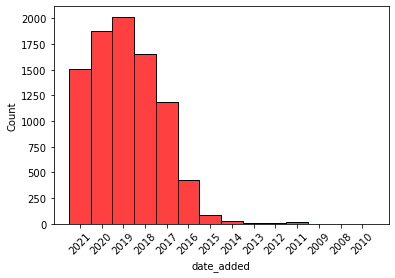

In [155]:
year_df=df['date_added'].apply(lambda x: str(x).split('-')[0])
sns.histplot(year_df,bins=5,color='r')
plt.xticks(rotation=45)
plt.show()

 More films fall under year "2019" bin. Is it due to more films released in 2019? let us check

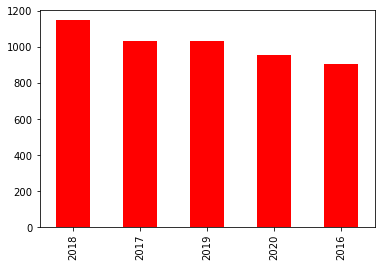

In [156]:
# FILMS RELEASED YEARLY
films_rel=df['release_year'].value_counts().sort_values(ascending=False).head(5)
films_rel.plot(kind='bar',color='r')
plt.show()

From above plot it is clear that in 2018 more movies were released than 2019 but movies were added in 2019 more.

 **2) WHAT ARE THE DIFFERENT GENRES AVAILABLE ON NETFLIX?

In [157]:
genres=new_df['listed_in'].nunique()
genres

42

There are 42 different genres available.

In [158]:
genres=new_df.groupby('listed_in')['show_id'].nunique().sort_values(ascending=False)
genres

listed_in
International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1351
Documentaries                    869
Action & Adventure               859
TV Dramas                        763
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
TV Comedies                      581
Thrillers                        577
Crime TV Shows                   470
Kids' TV                         451
Docuseries                       395
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 253
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     176
Spanish-Language TV Shows        174
TV Action & Adventure            168
Korean TV Shows             

<AxesSubplot:xlabel='listed_in'>

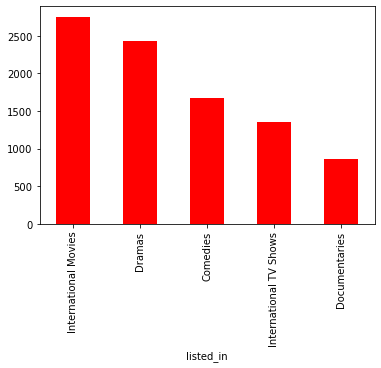

In [159]:
# TOP 5 POPULAR GENRES
top_genres=genres.sort_values(ascending=False).head()
top_genres.plot(kind='bar',color='r')

**3)WHICH COUNTRY HAS LEAST TRAFFIC IN TERMS OF MOVIES/SHOWS

In [164]:
new_df.groupby('country')['show_id'].count().sort_values()

country
Nicaragua             1
United States,        1
Uganda                1
Kazakhstan            1
Afghanistan           2
                  ...  
France             8252
Japan              8679
United Kingdom    12945
India             22814
United States     59324
Name: show_id, Length: 126, dtype: int64

United States, is repeated because of that extra comma. let us correct that

In [168]:
new_df.loc[new_df['show_id']=='s4654','country']='United States'
new_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."


**4)HOW MANY MOVIES AND TV SHOWS ARE AVAILABLE?

In [169]:
# using new df (as rows are splitted, values got repeated so groupby is needed)
films=new_df.groupby('type')['show_id'].nunique()
films

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [170]:
films=df['type'].value_counts()
films

Movie      6131
TV Show    2676
Name: type, dtype: int64

[]

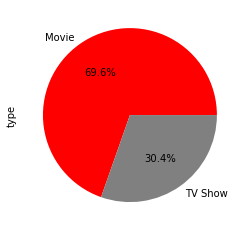

In [171]:
films.plot(kind='pie',normalize=True,autopct='%1.1f%%',colors=['red','grey'])
plt.plot()

<AxesSubplot:xlabel='type', ylabel='duration'>

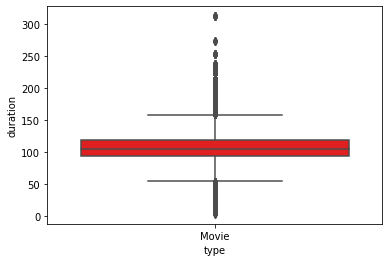

In [172]:
# SHOW THE STATISTICAL DISTRIBUTION OF DURATION OF MOVIES
Movies=new_df[new_df['type']=='Movie']
sns.boxplot(x='type',y='duration',data=Movies,color='r')


 There are so many outliers i.e many movies are there where they cross average movie time(minutes).

**4)How many movies and TV shows are available for each genre?

In [173]:
# COUNT OF MOVIES PER GENRE
movies=new_df[new_df['type']=='Movie']
movies_per_genre=movies.groupby(['listed_in'])['show_id'].nunique().sort_values(ascending=False)
movies_per_genre.head()

listed_in
International Movies    2752
Dramas                  2427
Comedies                1674
Documentaries            869
Action & Adventure       859
Name: show_id, dtype: int64

In [174]:
# COUNT OF TV SHOWS PER GENRE
shows=new_df[new_df['type']=='TV Show']
shows_per_genre=shows.groupby(['listed_in'])['show_id'].nunique().sort_values(ascending=False).head()
shows_per_genre

listed_in
International TV Shows    1351
TV Dramas                  763
TV Comedies                581
Crime TV Shows             470
Kids' TV                   451
Name: show_id, dtype: int64

In [175]:
# least available genres in  movies

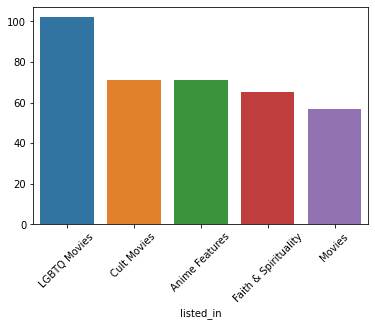

In [176]:
least=movies_per_genre.tail()
sns.barplot(x=least.index,y=least.values)
plt.xticks(rotation=45)
plt.show()

In [177]:
# WHICH COUNTRY GOT MORE TV-MA RATINGS
tvma=new_df[new_df['rating']=='TV-MA']
tvma.country.value_counts()

United States     14967
India              6324
United Kingdom     4345
Spain              4302
France             3908
                  ...  
Namibia               4
Zimbabwe              4
Mongolia              2
Armenia               2
Afghanistan           2
Name: country, Length: 98, dtype: int64

 United States got more TV-MA ratings

In [178]:
#GENRE POPULARITY PER COUNTRY
gc=new_df.groupby(['listed_in','country'])['show_id'].count().sort_values(ascending=False)
gc

listed_in                 country      
Comedies                  United States    8385
Dramas                    United States    8165
International Movies      India            7059
Dramas                    India            5569
Children & Family Movies  United States    4888
                                           ... 
Documentaries             Romania             1
                          Qatar               1
                          Poland              1
                          Philippines         1
Faith & Spirituality      Ireland             1
Name: show_id, Length: 1416, dtype: int64

In US, comediesa are more popular and in India, Internationsal Movies are popular

In [179]:
#storing cleaned data set to csv file
new_df.to_csv('Netflix_Final.csv',index=False)


# BUSINESS INSIGHTS

1)Netflix has more traffic in United States.
2)International Movies are widely played followed by dramas
3)Films added got declined from 2019.
4)Faith and spirituality movies are lacking on netflix.
5)Netflix business is mostly centered towards movies.
6)There are some countries like Nicaragua, Uganda, Kaghakshtan where netflix is not popular.

# RECOMMENDATIONS

1)Take reviews from users grouped by countries regarding their preferences of movies or tv shows
2)Maintain data of age groups to recommend content based on their age.
3)expand the business in other countries too.
4)Provide coupons to US and india citizens as they are among top who use netflix
5)Continuously refine and improve recommendation algorithms based on user feedback, preferences, and viewing history.
